## Projet MADMC -  Mounswif DARKAOUI et Dan MIMOUNI 

### Import des bibliothéques

In [2]:
import numpy as np
import copy
import time
import sys
import matplotlib.pyplot as plt

# 2. Résultats préliminaires

### Question 2
Fonction qui génère un ensemble de n vecteurs
où chaque composante est tirée aléatoirement selon une loi normale
d'espérance m et d'écart-type m/4.

In [3]:
# n : nombre de vecteur
# m : esperence
def gen_vect(n,m):
    vectors = []
    for i in range(n):
        vectors.append(np.random.normal(m,m/4,2).tolist())
    return vectors

# Exemple de test
# gen_vect(10,52)

### Question 3
Algorithme naïf pour déterminer les vecteurs non-dominés.
<br>Comparaisons par paires systématiques.

In [4]:
def opt_naif(n):
    for i, v1 in enumerate(n):
        a_supprimer = []
        #Comparaisons par paires systématiques
        for num in range(i+1,len(n)):
            v2 = n[num]
            if v1[0] >= v2[0] and v1[1] >= v2[1]:
                n.remove(v1)
                break
            if v1[0] <= v2[0] and v1[1] <= v2[1]:
                a_supprimer.append(v2)
        for v in a_supprimer:
            n.remove(v)
    return n


# Exemples de tests
# opt_naif(gen_vect(100,5))

# l = [[1.5,2.1535], [2.365,3.36453], [1,3],[2,2], [1,2],[2,1]]
# opt_naif(l)

### Question 4
Détermine les vecteurs non-dominés en réalisant :
    1. Un tri lexicographique des vecteurs
    2. Un parcours de la liste triée pour identifer les vecteurs non-dominés

In [5]:
def opt_lex(n):
    # Tri lexicographique
    n_tmp = np.array(n)
    n_ind = np.lexsort((n_tmp[:,1],n_tmp[:,0]))
    
    n = [0]*len(n_tmp)
    for i in range(len(n_tmp)):
        n[i] = n_tmp[n_ind[i]]

    x = n[0][0]
    y = n[0][1]

    a_supprimer = []
    
    #parcours pour identifier les vecteurs non-domines
    for i, vect in enumerate(n[1:]):
        x_tmp = vect[0]
        y_tmp = vect[1]

        if y <= y_tmp:
            a_supprimer.append(i+1)
        else:
            x = x_tmp
            y = y_tmp

    return np.delete(n,a_supprimer,0)

# Exemple de test
# l = [[1,2], [2,3], [1,3],[2,2], [1,2]]
# l = [[1,2], [2,3], [1,3],[2,2], [1,2],[2,1]]
# opt_lex(l)

### Question 5
Comparaison des deux algorithmes par l'intermédiaire des courbes du temps
d'exécution respectifs des deux algorithmes en fonction du nombres de vecteurs n. <br>

In [6]:
def comparaison_moyenne(nb_exec,n_min,n_max,pas,m):
    x = range(n_min,n_max+pas,pas)
    naif_moyenne = np.zeros(len(x))
    lex_moyenne = np.zeros(len(x))
    for i in range(nb_exec):
        for j,nb_vect in enumerate(x): # n_max + pas pour ajouter le 10000
            list_vect = gen_vect(nb_vect,m)
            
            #naif
            t0 = time.time()
            opt_naif(list_vect)
            naif_moyenne[j] += time.time() - t0
            
            #lexico
            t0 = time.time()
            opt_lex(list_vect)
            lex_moyenne[j] += time.time() - t0
    #moyenne
    naif_moyenne /= nb_exec
    lex_moyenne /= nb_exec
    return x,naif_moyenne,lex_moyenne

Dans les expérimentations, le nombre de vecteurs variera de n = 200
à n = 10000 (par pas de 200 par exemple), et on prendra m = 1000. Pour
chaque valeur de n, on fera une moyenne du temps d'exécution sur 50 ensembles
tirés aléatoirement.

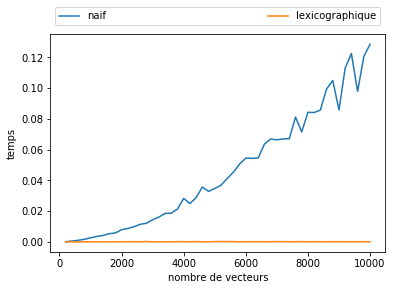

In [7]:
nb_exec = 50
n_min = 200
n_max = 10000
n_pas = 200
m = 1000

x,naif_moyenne,lex_moyenne = comparaison_moyenne(nb_exec,n_min,n_max,n_pas,m)
plt.plot(x,naif_moyenne, label="naif")
plt.plot(x,lex_moyenne, label = 'lexicographique')
plt.xlabel("nombre de vecteurs")
plt.ylabel('temps')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand")
plt.show()

# 3. Une première procédure de résolution

### Question 7 
Procédure de programmation dynamique en utilisant la fonction de la question 4 pour déterminer les points non-dominés en chaque case du tableau de programmation dynamique.

In [8]:
# n : liste de vecteurs
# k : nombre d'elements consideres 
def prog_dynamique(n,k):
    #init de la matrice avec des 0
    matrice = [[ [] for x in range(len(n))] for y in range(k)]

    #init de la premiere ligne pour l'algo
    for i in range(len(n)):
        matrice[0][i].append([0,0])
    
    #init du premier element
    matrice[1][0].append(n[0])

    #algo dynamique
    for i in range(1,len(matrice)):
        for j in range(i,len(matrice[i])):
            nouvelle_ensemble = copy.deepcopy(matrice[i-1][j-1])
            
            #parcours des vecteurs de ens et on ajoute le vecteur courant
            for i_ens in range(len(nouvelle_ensemble)):
                for j_ens in range(len(nouvelle_ensemble[i_ens])):
                    nouvelle_ensemble[i_ens][j_ens] += n[j][j_ens]
                
            #parcours des vecteurs de matrice[i][j-1] et ajout dans le nouvelle_ensemble
            for vector in matrice[i][j-1]:
                nouvelle_ensemble.append(vector)
            
            #calcul de l'optimal pour le nouvelle_ensemble
            #et ajout dans la matrice du nouvelle_ensemble optimal
            matrice[i][j] = list(opt_lex(nouvelle_ensemble)) 
    return matrice

# la derniere case du tableau est l'image des pareto non-domines
# Pour acceder a la derniere case du tableau on fera [-1][-1] comme ci dessous
# prog_dynamique(gen_vect(10,1000),10)[-1][-1]

### Question 8
Détermine un vecteur minimax dans un ensemble de vecteurs (en dimension 2).

In [9]:
# alpha_min et alpha_max à choisir 
# renvoi le vecteur qui minimise la fonction max()
def minimax(liste_vecteurs,alpha_min, alpha_max):
    res = []
    for vector in liste_vecteurs:
        x = vector[0]
        y = vector[1]
        if x > y :
            alpha = alpha_max
        else : 
            alpha = alpha_min
        res.append(x*alpha + (1-alpha)*y)
    index = res.index(min(res))
    return liste_vecteurs[index]

# Exemple de test
# minimax(gen_vect(10,1000),0.5,0.7)

### Question 9
Procédure en deux temps pour déterminer l'image dans l'espace des objectifs d'une solution minimax :
    1. déterminer les points non-dominés (au sens de Pareto) par programmation dynamique bi-objectifs 
    2. déterminer un point minimax parmi ceux-ci.

In [10]:
# k : nombre d'elements consideres 
def minimax_dynamique_phase(liste_vecteurs, k, alpha_min,alpha_max):
    new_liste = prog_dynamique(liste_vecteurs,k)[-1][-1]
    return minimax(new_liste,alpha_min,alpha_max)

# Exemple de test
# minimax_dynamique_phase(gen_vect(100,100),10,0.5,0.7)

# 4. Une seconde procédure de résolution

### Question 11
Création de la nouvelle instance pi' en modifiant le cout de l'instance pi en se servant de la définition de la I-dominance.(instance_pi_a_pi_prim)
<br>Reconstitution de l'image d'une solution de pi à partir de l'image d'une solution de pi'.(I_a_pareto)

In [11]:
#passage d'une instance de pi a pi_prim
def instance_pi_a_pi_prim(liste_vecteurs,alpha_min,alpha_max):
    for vecteur in liste_vecteurs:
        y_0 = vecteur[0]
        vecteur[0] = alpha_min * y_0 + (1-alpha_min) * vecteur[1]
        vecteur[1] = alpha_max * y_0 + (1-alpha_max) * vecteur[1]
    return liste_vecteurs

#transformation de l'image d'une solution de pi_prim a partir d'une solution de pi_prim 
def I_a_pareto(v,alpha_min,alpha_max):
    y_0 = v[0]
    v[0] = ((1-alpha_max)*v[0] - (1-alpha_min)*v[1])/(alpha_min - alpha_max )
    v[1] = (alpha_min*v[1] - alpha_max*y_0) / ( alpha_min - alpha_max )
    return v

# l = [[1,2], [2,3], [1,3], [2,2]]
# modif_vecteur(l,0.2,0.5)

#procedure2
def procedure2(liste_vecteurs,k,alpha_min,alpha_max):
    liste_vecteurs = instance_pi_a_pi_prim(liste_vecteurs,alpha_min,alpha_max)
    return I_a_pareto(minimax_dynamique_phase(liste_vecteurs,k,alpha_min,alpha_max),alpha_min,alpha_max)

Comparaison expérimentale de la première et la seconde procédure de résolution en traçant les courbes des temps d'exécution respectifs des deux procédures en fonction de αmax - αmin, sur des ensembles de vecteurs tirés aléatoirement à l'aide de la fonction de la question 2.

In [12]:
def comparaison_minimax_I(nb_exec,k,epsilon_min,epsilon_max,epsilon_pas,nb_vecteurs,m):
    x = np.arange(epsilon_min,epsilon_max+epsilon_pas,epsilon_pas)
    t_minimax = np.zeros(len(x))
    t_I = np.zeros(len(x))
    for i,epsilon in enumerate(x): 
        for j in range(nb_exec):
            liste_vecteurs = gen_vect(nb_vecteurs,m)

            alpha_min = 0.5 - epsilon
            alpha_max = 0.5 + epsilon
            
            t = time.time()
            minimax_dynamique_phase(liste_vecteurs,k,alpha_min,alpha_max)
            t_minimax[i] += time.time() - t
            
            t = time.time()
            procedure2(liste_vecteurs,k,alpha_min,alpha_max)
            t_I[i] += time.time() - t
    t_minimax /= nb_exec
    t_I /= nb_exec
    return x,t_minimax,t_I

Dans les expérimentations, on fixera nb_vecteurs = 50, k = 10 et m = 1000. On considérera les intervalles Iε = [0.5 − ε, 0.5 + ε] en faisant varier ε de 0.025 à 0.5 (par pas de 0.025 par exemple). Pour chaque intervalle Iε, on fera une moyenne du temps d'exécution sur 50 instances tirées aléatoirement

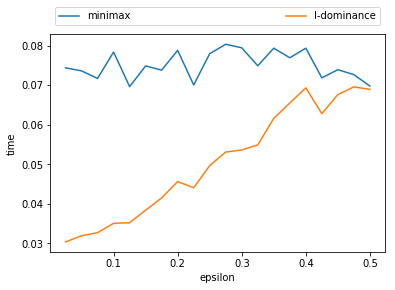

In [13]:
nb_exec = 50
k = 10
m = 1000
nb_vecteurs = 50
epsilon_min = 0.025
epsilon_max = 0.5
epsilon_pas = 0.025

x,t_minimax,t_I = comparaison_minimax_I(nb_exec,k,epsilon_min,epsilon_max,epsilon_pas,nb_vecteurs,m)
plt.plot(x,t_minimax, label="minimax")
plt.plot(x,t_I, label = 'I-dominance')
plt.xlabel('epsilon')
plt.ylabel('time')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand")
plt.show()